In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [42]:
cat4 = cv2.imread('DATA/CATS_DOGS/train/CAT/4.jpg')

In [43]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

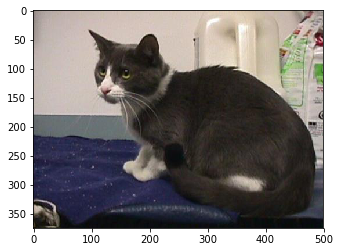

In [44]:
plt.imshow(cat4)

In [45]:
dog = cv2.imread('DATA/CATS_DOGS/train/DOG/4.jpg')

In [46]:
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

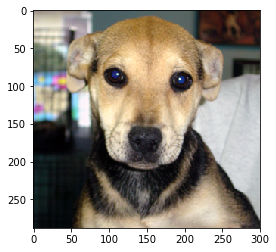

In [47]:
plt.imshow(dog)

In [48]:
dog.shape

(288, 300, 3)

In [49]:
dog.max()

255

In [50]:
cat4.shape

(375, 500, 3)

In [51]:
from keras.preprocessing.image import ImageDataGenerator

Para rescalar imagenes como DOG.MAX() tiene un valor máximo de 255, por lo tanto tenemos que normalizar mediante el generador de datos "rescale"
"Shear_range" corta la imagen

In [52]:

image_gen = ImageDataGenerator(rotation_range=30, 
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest'
                               )

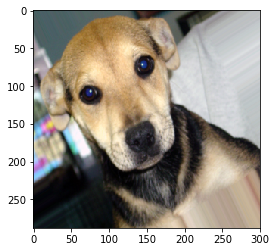

In [53]:
plt.imshow(image_gen.random_transform(dog))

In [54]:
image_gen.flow_from_directory('DATA/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


DEEP LEARNING ON CUSTOM IMAGES

In [63]:
input_shape = (150,150,3)

In [64]:
from keras.models import Sequential

In [65]:
from keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D

In [66]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0,5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',metrics=['accuracy'])
              

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18496)             0         
__________

In [75]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('DATA/CATS_DOGS/train',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')    

Found 18743 images belonging to 2 classes.


In [76]:
test_image_gen = image_gen.flow_from_directory('DATA/CATS_DOGS/test',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary') 

Found 6251 images belonging to 2 classes.


In [77]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [80]:
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,
                              validation_data=test_image_gen,validation_steps=12)

Epoch 1/1
150/150 [==============================] - 87s 579ms/step - loss: 0.6854 - acc: 0.5537 - val_loss: 0.6876 - val_acc: 0.5418


In [79]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
results.history['acc']

[0.55375]

In [82]:
from keras.models import load_model

In [83]:
new_model = load_model('cat_dog_100epochs.h5')

In [84]:
dog_file = 'DATA/CATS_DOGS/test/DOG/10005.jpg'

In [85]:
from keras.preprocessing import image

In [86]:
dog_img = image.load_img(dog_file,target_size=(150,150))

In [87]:
dog_img = image.img_to_array(dog_img)

In [88]:
dog_img.shape

(150, 150, 3)

Para que la red neronal piense que es un lote de una imagen hay que realizar un cambio sobre la imagen

In [89]:
import numpy as np
dog_img =np.expand_dims(dog_img,axis=0)

In [90]:
dog_img.shape

(1, 150, 150, 3)

 *Normalize the test data by dividing by the max value of the image arrays*

In [91]:
dog_img = dog_img/255

In [92]:
model.predict_classes(dog_img)

array([[1]])

In [93]:
model.predict(dog_img)

array([[0.6972473]], dtype=float32)